#ZfNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/My Drive/dataset'
train_dir = f"{base_dir}/train"
test_dir = f"{base_dir}/test"
val_dir = f"{base_dir}/validation"


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=8, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=8, class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=8, class_mode='categorical')


Found 1120 images belonging to 8 classes.
Found 320 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


In [ ]:
def build_zfnet(input_shape, num_classes):
    model = models.Sequential()

    # Layer 1
    model.add(layers.Conv2D(96, (7, 7), strides=(2, 2), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Layer 2
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Layer 3 - 5
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


In [ ]:
num_classes = train_generator.num_classes
input_shape = (224, 224, 3)
model = build_zfnet(input_shape, num_classes)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 1043s 7s/step - accuracy: 0.1432 - loss: 2.0363 - val_accuracy: 0.3313 - val_loss: 1.3721
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 129s 867ms/step - accuracy: 0.4326 - loss: 1.3836 - val_accuracy: 0.5562 - val_loss: 1.0678
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 127s 860ms/step - accuracy: 0.6542 - loss: 0.8211 - val_accuracy: 0.8000 - val_loss: 0.5573
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 140s 839ms/step - accuracy: 0.7901 - loss: 0.6198 - val_accuracy: 0.8062 - val_loss: 0.6001
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 143s 851ms/step - accuracy: 0.8776 - loss: 0.4109 - val_accuracy: 0.8562 - val_loss: 0.4011
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 141s 851ms/step - accuracy: 0.9332 - loss: 0.2170 - val_accuracy: 0.9500 - val_loss: 0.1352
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 128s 861ms/step - accuracy: 0.9406 - loss: 0.2219 - val_accuracy: 0.9250 - val_loss: 0.3175
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 142s 872ms/step - accuracy: 0.9137 - loss: 0.2351

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - accuracy: 0.9776 - loss: 0.0749
Test Accuracy: 0.9781249761581421


In [ ]:
model.save('/content/drive/My Drive/zfnet_model.h5')


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


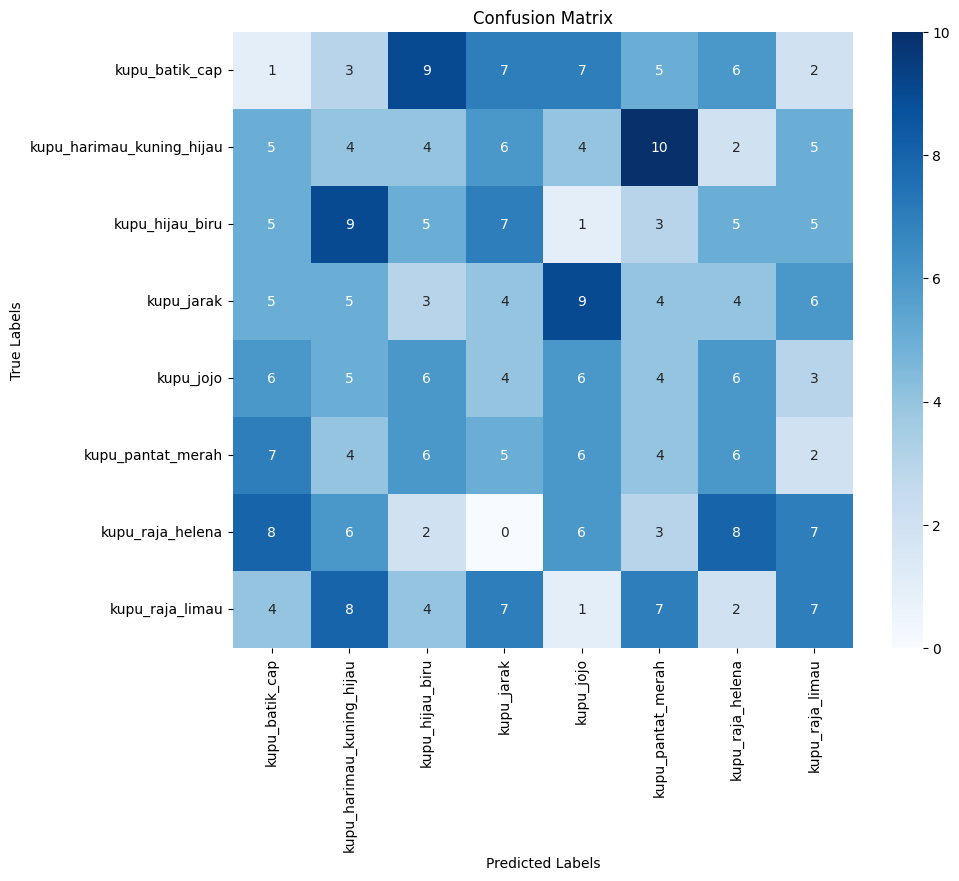

                           precision    recall  f1-score   support

           kupu_batik_cap       0.02      0.03      0.02        40
kupu_harimau_kuning_hijau       0.09      0.10      0.10        40
          kupu_hijau_biru       0.13      0.12      0.13        40
               kupu_jarak       0.10      0.10      0.10        40
                kupu_jojo       0.15      0.15      0.15        40
        kupu_pantat_merah       0.10      0.10      0.10        40
         kupu_raja_helena       0.21      0.20      0.20        40
          kupu_raja_limau       0.19      0.17      0.18        40

                 accuracy                           0.12       320
                macro avg       0.12      0.12      0.12       320
             weighted avg       0.12      0.12      0.12       320



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Mengambil prediksi pada data uji
test_generator.reset()  # Reset generator
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# Mendapatkan label prediksi dan label asli
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.metrics import classification_report

# Menampilkan laporan klasifikasi
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))